## 2.5 Tensorflow

### Tensorflow
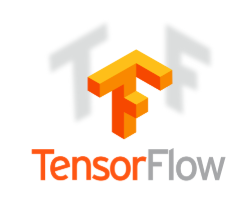
* 구글이 만든 Numerical Computation을 위한 오픈소스 소프트웨어
* C++, Python biding
* Data Flow Graphs 기반
    * 그래프
    * 노드
    * 엣지
* 머신러닝/딥러닝에 필요한 이미 구현된 함수
* High-Level API
    * 추상화 단계가 높은 API : Keras
* Low-Level API
    * Data Flow Graph 기반 API
* GPU(CUDA) 지원
    * 코드 변경없이 CPU 환경과 호환
* 데이터, 모델 병렬화
* TensorBoard 시각화 도구

### Tensor & Graph
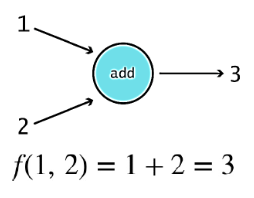
* graph 저장

```tf.summary.FileWriter('./logs', sess.graph)```

#### Tensor Graph 예제

In [2]:
import tensorflow as tf
a = tf.constant(2, name='a')
b = tf.constant(3, name='b')

#f = a + b
f = tf.add(a, b, name="add")
print(f)

#sess = tf.Session()
sess = tf.compat.v1.Session()
print(sess.run(f))

tf.summary.FileWriter('./logs', sess.graph)
#tf.summary.FileWriter('./logs', tf.get_default_graph())
sess.close()

tf.Tensor(5, shape=(), dtype=int32)


RuntimeError: The Session graph is empty.  Add operations to the graph before calling run().

* tensor board 실행

``` $ tensorboard --logdir=./logs```

* 웹 브라우져에서 URL로 접속
 * http://localhost:6006

#### Tensorflow Linear Regression Low-Level API 예제

In [2]:
import tensorflow as tf
import numpy as np
x_data = np.arange(10)
y_data = x_data * 2 + 10

W = tf.Variable(tf.random_uniform([1], -1., 1.))
b = tf.Variable(tf.random_uniform([1], -1., 1.))

X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')
hypothesis = W * X + b

cost = tf.reduce_mean(tf.square(hypothesis - Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.03)
train_op = optimizer.minimize(cost)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(500):
        _, cost_val = sess.run([train_op, cost], feed_dict={X: x_data, Y: y_data})
#        if step%20 ==0:
#            print(step, cost_val, sess.run(W), sess.run(b))

    print("X: 5,  Y:", 5*2+10, ",Y':", sess.run(hypothesis, feed_dict={X: 5}))
    print("X: 12.5, Y:", 12.5*2+10, ",Y':", sess.run(hypothesis, feed_dict={X: 12.5}))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
X: 5,  Y: 20 ,Y': [19.999647]
X: 12.5, Y: 35.0 ,Y': [35.00174]


#### Tensorflow Linear Regression High-Level API 예제

In [3]:
import tensorflow as tf
import numpy as np

x = np.arange(10)
y = x * 2 + 10

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1, input_shape=(1,)))
model.compile('SGD', 'mse')

model.fit(x, y, epochs=500, verbose=0)

print("X: 5,  Y:", 5*2+10, ",Y':",  model.predict([5]))
print("X: 12.5, Y:", 12.5*2+10, ",Y':",  model.predict([12.5]))

Instructions for updating:
Use tf.cast instead.
X: 5,  Y: 20 ,Y': [[19.888391]]
X: 12.5, Y: 35.0 ,Y': [[35.547195]]
